# Finding probability density distribution of  enzymes in metagenomes.
> Once is defined the group of metagenomes that represent the reference (not perturbated samples), the next step is to identify the probability density distribution of the relative frequencies for every enzyme in those metagenomes, this blog is a guide to find out that information.


> It is important to point out, that every relative frequency of every enzyme annotated in each metagenome was multiplied by 10^6, with the intention of eliminate the noise that results from different sequencing depth that each sample has.
- author: María del Carmen Sánchez Olmos
- Thesis name: Inference and comparison of metabolic profiles between perturbed and not perturbed samples of shotgun metagenomes of marine sediments.
- Thesis advisor: Rosa María Gutiérrez Ríos.



In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import *
import math
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.stats import beta,lognorm,gamma,weibull_min,weibull_max, dweibull
import math
import fitter
from fitter import Fitter, get_common_distributions, get_distributions

### Load a matrix of enzymes for all references samples:

In [2]:
data_ref=pd.read_table("dataRef.csv",index_col="enzima")

In [3]:
data_ref=data_ref.T

In [4]:
data_ref

enzima,E1.1.1.1,E1.1.1.100,E1.1.1.103,E1.1.1.127,E1.1.1.133,E1.1.1.136,E1.1.1.157,E1.1.1.159,E1.1.1.169,E1.1.1.18,...,E6.4.1.1,E6.4.1.2,E6.4.1.3,E6.4.1.4,E6.5.1.1,E6.5.1.2,E6.5.1.6,E6.5.1.7,E6.6.1.1,E6.6.1.2
R1,2434.229005,2281.025781,417.053221,229.804836,672.391928,212.782256,519.188704,119.158063,748.993540,93.624192,...,1532.032241,2442.740295,1021.354827,868.151603,1421.385468,1455.430629,970.287086,970.287086,1225.625793,2102.288686
R2,1724.379644,3045.703070,483.667461,375.017524,1072.480022,897.238189,1584.186177,94.630590,560.773868,311.930464,...,750.035048,1668.302257,1563.157157,283.891771,879.714005,2344.735735,578.298051,578.298051,410.065891,238.328894
R3,2896.216783,3569.038590,529.552474,322.809385,605.720980,515.044187,834.226500,172.285908,888.632576,213.997233,...,747.176778,2451.900495,1342.016543,1158.849420,663.754128,1298.491682,290.165739,290.165739,288.352203,645.618769
R4,1552.266990,2876.494757,396.068124,300.051609,984.169277,832.143129,976.167901,24.004129,532.091520,308.052985,...,1216.209188,2480.426633,1512.260109,576.099089,592.101842,1556.267678,224.038535,224.038535,404.069500,492.084639
R5,2458.344715,3660.202131,874.078121,163.889648,1529.636711,710.188473,874.078121,54.629883,819.448238,655.558591,...,109.259765,1693.526359,928.708003,163.889648,600.928708,1966.675772,546.298825,546.298825,273.149413,655.558591
R6,740.260942,1702.600167,314.610900,18.506524,1017.858795,351.623947,703.247895,129.545665,314.610900,18.506524,...,1110.391413,2812.991580,999.352272,536.689183,592.208754,1887.665402,555.195706,555.195706,92.532618,333.117424
R7,1170.091445,2077.336261,313.720170,76.310312,1008.991898,415.467252,529.932720,131.423314,1034.428669,178.057394,...,1479.572154,1441.416998,847.892352,254.367705,496.017026,1399.022380,411.227791,411.227791,1153.133598,4786.352325
R8,1845.337738,3407.963566,505.454626,452.339056,968.074115,1110.286773,1437.547226,77.103248,731.624154,567.137225,...,678.508583,1478.668958,1170.255966,289.565532,661.374528,1617.454805,520.875276,520.875276,258.724233,202.181851
R9,1523.259776,3347.162929,300.643377,340.729160,641.372537,942.015914,1944.160503,80.171567,681.458321,220.471810,...,781.672780,1302.787966,1583.388451,300.643377,1924.117612,1603.431343,1683.602910,1683.602910,641.372537,761.629888
R10,1544.309812,2851.033500,435.574562,217.787281,910.746812,811.752594,1326.522531,79.195375,692.959531,197.988437,...,593.965312,2494.654312,1663.102875,574.166469,791.953750,1781.895937,712.758375,712.758375,296.982656,376.178031


### Now take the row with information of the rate of every enzyme:

In [5]:
data_ref=data_ref[:24]


In [81]:
#data_ref.to_csv("data_ec_correct.csv")

>In order to visualize how is the data of every reference sample we are going to make a boxplot graph:

In [9]:
data_ref_box=data_ref.T

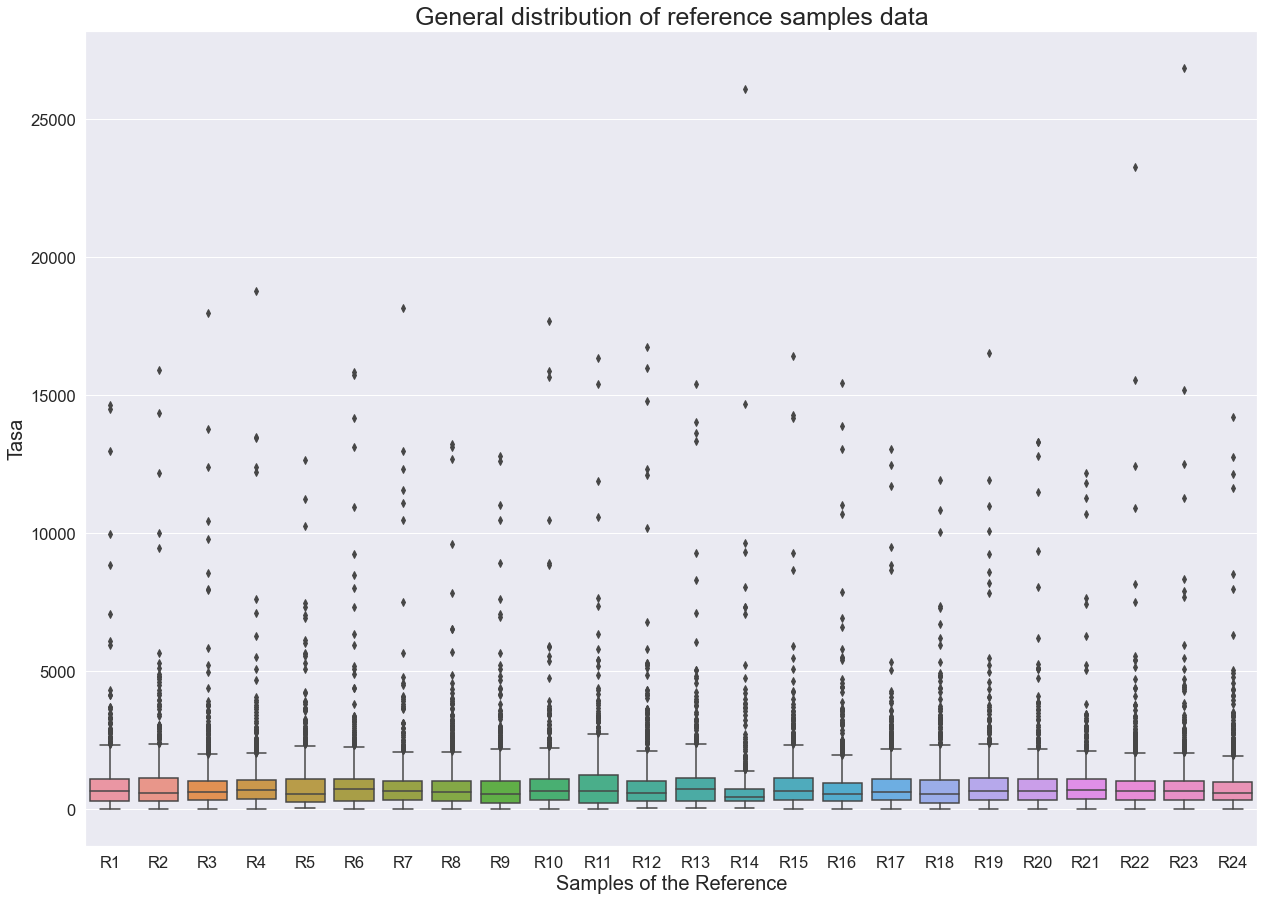

In [10]:
sns.set_theme(palette="hls")
sns.set(font_scale=1.5)
plt.figure(figsize=(21,15))
plt.tight_layout()
plt.title("General distribution of reference samples data", fontsize=25)
plt.xlabel("Samples of the Reference", fontsize=20)
plt.ylabel("Tasa", fontsize=20)
sns.set_style("white")
sns.boxplot(data=data_ref_box)
plt.savefig("Tasa_dist_referencias_boxplot.png")

### Calculating the statatistics of every sample:
> such as: mean, standard deviation, max and min, etc.

In [11]:
data_ref_sta= data_ref.describe()

In [12]:
frames_bien=[data_ref,data_ref_sta] 

In [13]:
data_stats=pd.concat(frames_bien) ## concatenate both dataframes

In [28]:
#data_stats

### Read the dataframe for the perturbed samples:

In [15]:
data_per_golf=pd.read_csv("ec_tasas_per_golfo.csv",index_col="Sample")

In [16]:
data_per_golf= data_per_golf.replace(' NaN',np.NaN)
data_per_golf=data_per_golf.add_prefix('E') ## add an E to every column name

In [18]:
data_per_golf=data_per_golf.astype("float") ## make all numbers floats instead of int to do calculations

In [19]:
data_per_golf

,E1.10.2.2,E1.10.3.1,E1.10.3.10,E1.10.3.11,E1.10.3.12,E1.10.3.14,E1.10.3.9,E1.10.9.1,E1.1.1.1,E1.1.1.10,...,E6.4.1.9,E6.5.1.1,E6.5.1.2,E6.5.1.3,E6.5.1.4,E6.5.1.5,E6.5.1.6,E6.5.1.7,E6.6.1.1,E6.6.1.2
Sample,,,,,,,,,,,,,,,,,,,,,
ERR1730306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7462.686567,NaN,...,NaN,4975.124378,NaN,NaN,2487.562189,NaN,4975.124378,4975.124378,2487.562189,NaN
ERR3365596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4016.064257,2008.032129
SRR11308316,87.947344,NaN,59.804194,NaN,24.625256,566.380896,NaN,235.698882,1667.481645,10.553681,...,NaN,524.166171,1315.692269,1660.445858,443.254615,21.107363,376.414633,376.414633,358.825164,161.823113
SRR11308317,246.097655,11.880576,62.797333,59.402882,20.366702,577.056570,NaN,105.227963,3416.514341,NaN,...,NaN,997.968421,1474.888704,935.171089,123.897440,10.183351,288.528285,288.528285,444.673004,1412.091372
SRR2657579,351.486127,NaN,439.357659,NaN,NaN,2262.691944,219.67883,175.743064,1977.109466,NaN,...,NaN,296.566420,1351.024802,1120.362031,164.759122,10.983941,164.759122,164.759122,406.405835,428.373718
SRR8457023,57.227881,NaN,114.455763,NaN,NaN,171.683644,NaN,171.683644,801.190340,NaN,...,515.050933,1259.013391,1087.329747,1659.608561,743.962459,57.227881,972.873984,972.873984,1602.380680,4978.825684


## Shapiro-Wilk test:
> The first step in the analysis of distributions is to find out what enzymes follow a normal distribution in the reference dataset, for that objetive we use Shapiro test to contrast the normality of the data:


In [22]:
list_ec_normal=[] # defines the list for enzymes that follow a normal distribution
count=0
data_to_test=data_stats[:24]
data_to_test
for column in data_to_test:
    values=data_to_test[column]
    values=list(values)
    shapiro_test=scipy.stats.shapiro(values)
    pvalue=shapiro_test.pvalue
    w= shapiro_test.statistic
    mean=data_stats[column].loc['mean']
    one_quarter_of_mean=float(0.4* mean)
    std=data_stats[column].loc['std']
    if pvalue >= 0.05 and w <= 1 and std <= one_quarter_of_mean:
        count=count+1
        result=column,pvalue,w,std,mean
        lista=(result[0])
        list_ec_normal.append(column)
    else:
        pass
print(count)
with open ("list_ec_normal.txt",'w') as output_norm:
    output_norm.write(str(list_ec_normal))
#list_ec_normal # you can display the list of enzymes that follow a normal distribution

357


### Now, we only choose the enzymes that follow a normal distribution from the perturbed samples

In [23]:
frames_2=[data_per_golf,data_ref_sta]

In [24]:
df_per_stats=pd.concat(frames_2)

In [25]:
df_per_golf_statistics_ref_normales= df_per_stats[df_per_stats.columns & list_ec_normal]

<ipython-input-25-c5baf7c133ef>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  df_per_golf_statistics_ref_normales= df_per_stats[df_per_stats.columns & list_ec_normal]


In [27]:
df_per_golf_statistics_ref_normales ## concatanate the statistics of normal enzymes (reference) with the data of the perturbed dataset (also normal enzymes)

,E1.1.1.1,E1.1.1.100,E1.1.1.169,E1.1.1.193,E1.1.1.205,E1.1.1.219,E1.1.1.23,E1.1.1.25,E1.1.1.267,E1.1.1.271,...,E6.3.5.1,E6.3.5.2,E6.3.5.3,E6.3.5.4,E6.3.5.6,E6.3.5.7,E6.4.1.1,E6.4.1.2,E6.4.1.3,E6.5.1.2
ERR1730306,7462.686567,2487.562189,NaN,NaN,4975.124378,NaN,NaN,2487.562189,NaN,NaN,...,NaN,4975.124378,NaN,2487.562189,4975.124378,9950.248756,NaN,7462.686567,7462.686567,NaN
ERR3365596,NaN,NaN,2008.032129,NaN,NaN,NaN,2008.032129,NaN,NaN,NaN,...,NaN,4016.064257,6024.096386,2008.032129,4016.064257,8032.128514,2008.032129,NaN,NaN,NaN
SRR11308316,1667.481645,3623.430580,1002.599723,780.972416,1361.424888,362.343058,953.349211,770.418735,805.597673,372.896739,...,847.812398,1670.999539,3053.531789,1421.229082,2596.205600,2983.173914,1132.761793,1846.894227,1340.317525,1315.692269
SRR11308317,3416.514341,4871.036343,1240.671626,855.401504,1150.718690,695.862335,882.557107,826.548676,646.642804,356.417293,...,678.890083,1649.702901,2620.515719,2510.196080,5106.950646,5251.214789,673.798407,2152.081562,1743.050287,1474.888704
SRR2657579,1977.109466,2800.905077,878.715318,571.164957,1340.040860,648.052547,637.068606,691.988313,746.908020,702.972255,...,724.940138,1702.510929,2141.868588,2141.868588,2086.948881,2108.916764,1592.671514,1977.109466,1471.848158,1351.024802
SRR8457023,801.190340,1716.836443,400.595170,629.506696,801.190340,228.911526,1087.329747,743.962459,400.595170,572.278814,...,686.734577,1659.608561,2975.849834,1831.292206,3319.217123,4463.774751,2804.166190,1487.924917,1201.785510,1087.329747
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2067.402722,3106.897539,739.247640,728.384586,1225.006396,499.879330,923.047785,890.158967,659.739005,645.872226,...,741.943812,1914.634850,2762.163586,2035.770949,3291.335260,3739.630619,858.319671,2246.858822,1402.745751,1620.656096
std,663.154781,746.041458,212.435854,168.095322,191.225384,154.282171,183.986562,164.376034,162.087628,232.744714,...,275.555550,464.703967,443.535482,644.164215,729.824894,873.799754,339.916387,756.806672,363.823509,355.396651
min,740.260942,1702.600167,314.610900,436.142979,856.371275,82.743784,413.718919,597.326254,349.341905,289.603244,...,109.259765,951.553515,1489.388110,455.090811,2316.464718,2427.094603,109.259765,1067.763431,816.466847,703.322163


## Definition of the z-score of normal distributed enzymes:
>Create a function that calculates the z-score:

In [30]:
def get_z_score(values,column,mean,std,df):
    lista=[]
    for i in values:
        x=float(i)-float(mean)
        z_score=x/std
        z_score=float(z_score)
        lista.append(z_score)
    lista=pd.Series(lista)
    df[column]=lista.values

In [31]:
data_set_to_test=df_per_golf_statistics_ref_normales[:6]
index=data_set_to_test.index
df_z_scores_normales_golf=pd.DataFrame(index=index,columns=df_per_golf_statistics_ref_normales.columns)
for column in data_set_to_test:
    values=data_set_to_test[column]
    values=list(values)
    mean=df_per_golf_statistics_ref_normales[column].loc['mean']
    std=df_per_golf_statistics_ref_normales[column].loc['std']    
    result=get_z_score(values,column,mean,std,df_z_scores_normales_golf)

In [35]:
df_z_scores_normales_golf

,ERR1730306,ERR3365596,SRR11308316,SRR11308317,SRR2657579,SRR8457023
E1.1.1.1,8.135784,NaN,-0.603058,2.034384,-0.136157,-1.909377
E1.1.1.100,-0.830162,NaN,0.692365,2.364666,-0.410155,-1.863249
E1.1.1.169,NaN,5.972553,1.239678,2.360355,0.656517,-1.594140
E1.1.1.193,NaN,NaN,0.312845,0.755624,-0.935300,-0.588225
E1.1.1.205,19.610984,NaN,0.713391,-0.388482,0.601565,-2.216317
...,...,...,...,...,...,...
E6.3.5.7,7.107599,4.912450,-0.865709,1.729898,-1.866233,0.828730
E6.4.1.1,NaN,3.382339,0.807381,-0.542843,2.160390,5.724486
E6.4.1.2,6.891889,NaN,-0.528490,-0.125233,-0.356431,-1.002811
E6.4.1.3,16.656265,NaN,-0.171589,0.935356,0.189934,-0.552356


In [339]:
#df_z_scores_normales_golf.to_csv("normales_golf_per.csv")

In [38]:
df_z_scores_normales_golf_box=df_z_scores_normales_golf

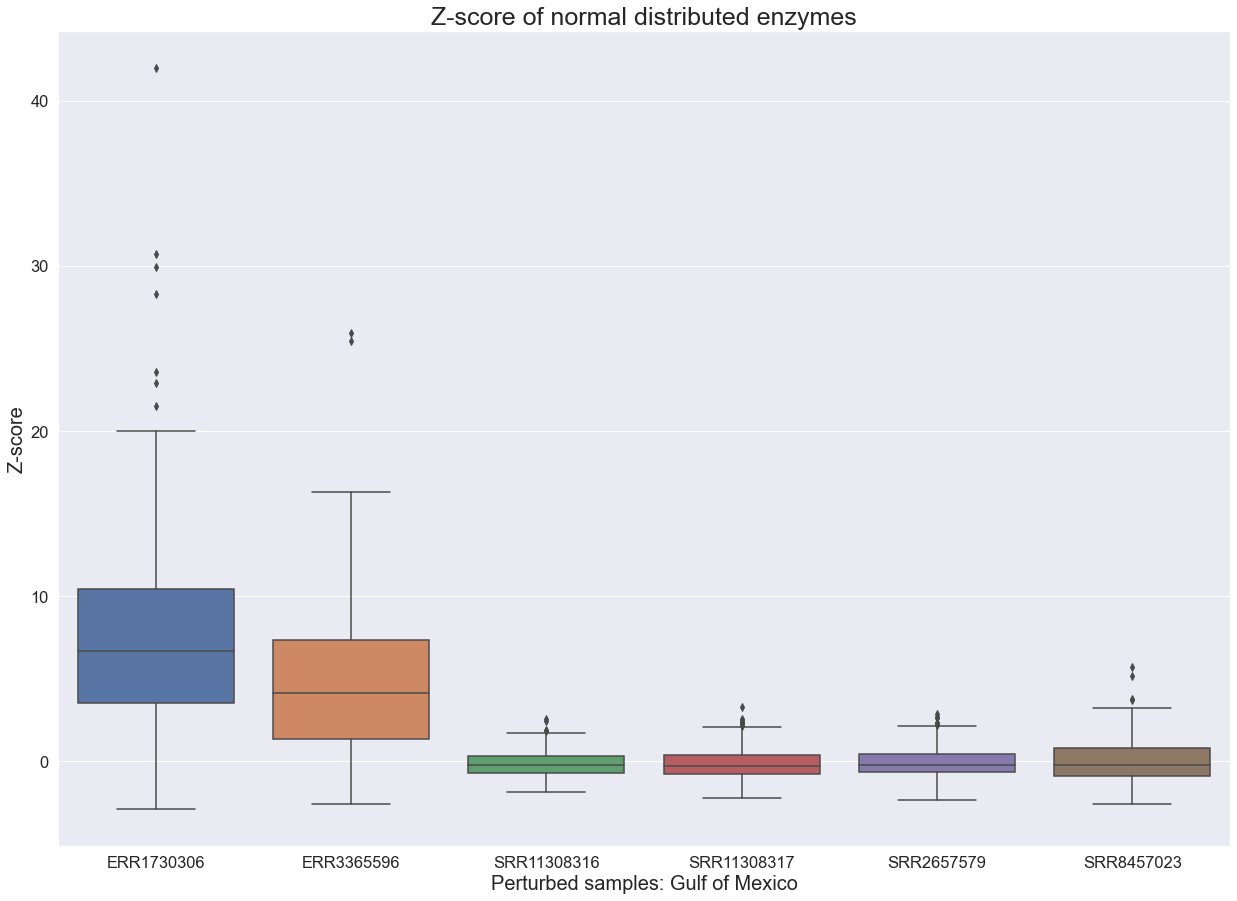

In [69]:
sns.set_theme(palette="hls")
sns.set(font_scale=1.5)
plt.figure(figsize=(21,15))
plt.tight_layout()
plt.title("Z-score of normal distributed enzymes", fontsize=25)
plt.xlabel("Perturbed samples: Gulf of Mexico", fontsize=20)
plt.ylabel("Z-score", fontsize=20)
sns.set_style("whitegrid")
sns.boxplot(data=df_z_scores_normales_golf_box)
plt.savefig("Z-score_ec_dist_normal.png")

### Select only the enzymes that do not follow a normal distribution:

In [43]:
data_set_no_normales= data_ref.drop(axis=1, columns=list_ec_normal, inplace=False, errors='raise')

## Function to find the best distribution which adjust to our data:
> The next step is to find the distribution of the enzymes which do not follow a normal one, for this step we use Fitter library of python:

In [47]:
def get_dist (column,values,df):
    f = Fitter(values,
           distributions=['gamma',
                          'lognorm',
                          'dweibull'])
    f.fit()
    x=f.get_best(method = 'aic') ##akaike criterion of information
    values_view= x.values()
    value_iterator = iter(values_view)
    first_value = next(value_iterator)
    a= first_value[0]
    loc=first_value[1]
    if list(x.keys())[0]=='gamma':
        scale=first_value[2]
        print(list(x.keys())[0],column,a,loc,scale)
    elif list(x.keys())[0]=='dweibull':
        scale=first_value[2]
        print(list(x.keys())[0],column,a,loc,scale)
    elif list(x.keys())[0]=='lognorm':
        scale=first_value[2]
        print(list(x.keys())[0],column,a,loc,scale)
    else:
        print(list(x.keys())[0])
      

In [49]:
for column in data_set_no_normales:
    values=data_set_no_normales[column].values
    result = get_dist(column, values,data_set_no_normales)
    

gamma E1.1.1.103 178.66189495167885 -2222.888259829603 14.811262650293163
gamma E1.1.1.127 2918.418140215621 -7131.606130639533 2.538541311856216
gamma E1.1.1.133 1.4977605263761542 510.74521901997855 201.01844263192248
gamma E1.1.1.136 376.7299705380051 -5381.592310763077 16.149443360114518
gamma E1.1.1.157 7.8063538296728145 -258.81380462682364 167.2089120200265
dweibull E1.1.1.159 1.5449665974452298 91.44484459141496 51.30001367091167
gamma E1.1.1.18 2.705280617184986 -47.173300803354536 140.32559754094797
gamma E1.1.1.2 0.4910054736604184 16.038749619078693 197.67122354353552
gamma E1.1.1.22 0.5899116066816287 1046.4101964240697 519.3537586705481
gamma E1.1.1.26 2.26969780598289 144.6302269526763 153.40701094701592
gamma E1.1.1.262 3.3002353153328094 158.98348449958857 112.80058371336548
gamma E1.1.1.27 0.8033258970331432 55.51957064865369 141.19506031587449
gamma E1.1.1.29 1.441245831459486 74.60186006335726 127.23057135438064
dweibull E1.1.1.308 1.0104366167900856 147.12387556707

In [50]:
#save the last output and read it:
df_fit_dists=pd.read_csv("/Users/mariac.sanchez/Master_project/dist_ec_ref_correct.csv",index_col="Enzima")

In [51]:
df_fit_dists=df_fit_dists.T

In [52]:
df_fit_dists

Enzima,E1.1.1.103,E1.1.1.127,E1.1.1.133,E1.1.1.136,E1.1.1.157,E1.1.1.159,E1.1.1.18,E1.1.1.2,E1.1.1.22,E1.1.1.26,...,E6.3.5.10,E6.3.5.11,E6.3.5.5,E6.3.5.9,E6.4.1.4,E6.5.1.1,E6.5.1.6,E6.5.1.7,E6.6.1.1,E6.6.1.2
Dist,gamma,gamma,gamma,gamma,gamma,dweibull,gamma,gamma,gamma,gamma,...,gamma,gamma,gamma,gamma,gamma,gamma,gamma,gamma,gamma,dweibull
a,178.661895,2918.41814,1.497761,376.729971,7.806354,1.544967,2.705281,0.491005,0.589912,2.269698,...,2.704603,1.863926,4945.806678,1.863926,2.97238,2.778027,0.886017,0.886017,3.588863,0.722526
loc,-2222.88826,-7131.606131,510.745219,-5381.592311,-258.813805,91.444845,-47.173301,16.03875,1046.410196,144.630227,...,-1.467699,27.632366,-45532.515965,27.632366,-71.602428,166.096575,218.547388,218.547388,-86.492992,645.618769
scale,14.811263,2.538541,201.018443,16.149443,167.208912,51.300014,140.325598,197.671224,519.353759,153.407011,...,162.337737,218.637619,9.928119,218.637619,220.570385,225.329047,415.766354,415.766354,165.770817,681.071925


### Define a new dataframe to fill with the  equivalent z-scores:

In [190]:
data_per_golf_z_no_norm_scores=pd.DataFrame(index=data_per_golf.index,columns=data_per_golf.columns)

### Eliminate the normal distributed enzymes from the problem dataframe:

In [54]:
data_per_golf_no_norm=data_per_golf.drop(axis=1, columns=list_ec_normal, inplace=False, errors='raise')

In [55]:
data_per_golf_no_norm

,E1.10.2.2,E1.10.3.1,E1.10.3.10,E1.10.3.11,E1.10.3.12,E1.10.3.14,E1.10.3.9,E1.10.9.1,E1.1.1.10,E1.1.1.101,...,E6.4.1.8,E6.4.1.9,E6.5.1.1,E6.5.1.3,E6.5.1.4,E6.5.1.5,E6.5.1.6,E6.5.1.7,E6.6.1.1,E6.6.1.2
Sample,,,,,,,,,,,,,,,,,,,,,
ERR1730306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4975.124378,NaN,2487.562189,NaN,4975.124378,4975.124378,2487.562189,NaN
ERR3365596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4016.064257,2008.032129
SRR11308316,87.947344,NaN,59.804194,NaN,24.625256,566.380896,NaN,235.698882,10.553681,NaN,...,10.553681,NaN,524.166171,1660.445858,443.254615,21.107363,376.414633,376.414633,358.825164,161.823113
SRR11308317,246.097655,11.880576,62.797333,59.402882,20.366702,577.056570,NaN,105.227963,NaN,NaN,...,52.613981,NaN,997.968421,935.171089,123.897440,10.183351,288.528285,288.528285,444.673004,1412.091372
SRR2657579,351.486127,NaN,439.357659,NaN,NaN,2262.691944,219.67883,175.743064,NaN,10.983941,...,32.951824,NaN,296.566420,1120.362031,164.759122,10.983941,164.759122,164.759122,406.405835,428.373718
SRR8457023,57.227881,NaN,114.455763,NaN,NaN,171.683644,NaN,171.683644,NaN,NaN,...,NaN,515.050933,1259.013391,1659.608561,743.962459,57.227881,972.873984,972.873984,1602.380680,4978.825684


### Determination of the equivalent-z-score:
> For every point in the perturbed dataset, we calculate the probability of observing that point due to the probability density distribution calculated before for every enzyme and then we calculate the equivalent-z-score (for a normal distribution).


In [200]:
for column in df_fit_dists:
    if column in data_per_golf_no_norm.columns:
        test=data_per_golf_no_norm[column].values
        a = df_fit_dists[column].loc['a']
        loc=df_fit_dists[column].loc['loc']
        scale=df_fit_dists[column].loc['scale']
        dist=df_fit_dists[column].loc['Dist']
        if dist == 'gamma':
            for i in test:
                index = data_per_golf_no_norm[data_per_golf_no_norm[column]==i].index.values
                p=gamma.cdf(i,a,loc=loc,scale=scale)
                q=norm.ppf(p)                
                print(index,column,i,p,q)
        elif dist =='dweibull':
            for i in test:
                index = data_per_golf_no_norm[data_per_golf_no_norm[column]==i].index.values
                p=dweibull.cdf(i,a,loc=loc,scale=scale)
                q=norm.ppf(p)
                print(index,column,i,p,q)
        elif dist=='lognorm':
            for i in test:
                index = data_per_golf_no_norm[data_per_golf_no_norm[column]==i].index.values
                p=lognorm.cdf(i,a,loc=loc,scale=scale)
                q=norm.ppf(p)
                print(index,column,i,p,q)
        else:
            pass
    else:
        pass

[] E1.1.1.103 nan nan nan
[] E1.1.1.103 nan nan nan
['SRR11308316'] E1.1.1.103 569.8987901963336 0.7739676838776877 0.7519774293354907
['SRR11308317'] E1.1.1.103 471.8286074097458 0.6058225196795866 0.26844739658644395
['SRR2657579'] E1.1.1.103 406.4058346697129 0.4758132936106753 -0.060664270547963244
['SRR8457023'] E1.1.1.103 114.45576284765937 0.05478459687490867 -1.600132494335935
[] E1.1.1.127 nan nan nan
[] E1.1.1.127 nan nan nan
['SRR11308316'] E1.1.1.127 390.48620809748786 0.7967567481639561 0.8300924708364211
['SRR11308317'] E1.1.1.127 347.9311673345248 0.6992818566064612 0.5223361741666478
['SRR2657579'] E1.1.1.127 307.5503613716746 0.590652377358246 0.22922345258440585
[] E1.1.1.127 nan nan nan
[] E1.1.1.133 nan nan nan
[] E1.1.1.133 nan nan nan
['SRR11308316'] E1.1.1.133 524.1661712299612 0.012565515263159452 -2.239382630887401
['SRR11308317'] E1.1.1.133 551.5981921157099 0.061414699011665394 -1.5430056790135258
['SRR2657579'] E1.1.1.133 681.004371608708 0.36254602325609847

### Reading the information of non-normal enzymes z-scores for every perturbed samples

In [73]:
SRR2657579_zscr=pd.read_table("/Users/mariac.sanchez/Master_project/SRR2657579_zscr.txt", index_col="EC")

In [74]:
SRR11308316_zscr=pd.read_table("/Users/mariac.sanchez/Master_project/SRR11308316_zscr.txt", index_col="EC")

In [75]:
SRR11308317_zscr=pd.read_table("/Users/mariac.sanchez/Master_project/SRR11308317_zscr.txt", index_col="EC")

In [76]:
ERR3365596_zscr=pd.read_table("/Users/mariac.sanchez/Master_project/ERR3365596_zscr.txt", index_col="EC")

In [77]:
SRR8457023_zscr=pd.read_table("/Users/mariac.sanchez/Master_project/SRR8457023_zscr.txt", index_col="EC")

In [78]:
ERR1730306_zscr=pd.read_table("/Users/mariac.sanchez/Master_project/ERR1730306_zscr.txt", index_col="EC")

In [79]:
frames=[SRR2657579_zscr,SRR11308316_zscr,SRR11308317_zscr,ERR3365596_zscr,SRR8457023_zscr,ERR1730306_zscr]

In [88]:
DATA=SRR11308317_zscr.merge(SRR11308316_zscr, how='left', on='EC')

In [93]:
DATA=DATA.merge(ERR1730306_zscr, how='left', on='EC')

In [82]:
DATA.to_csv("Z-scores_no_norm_per.csv")

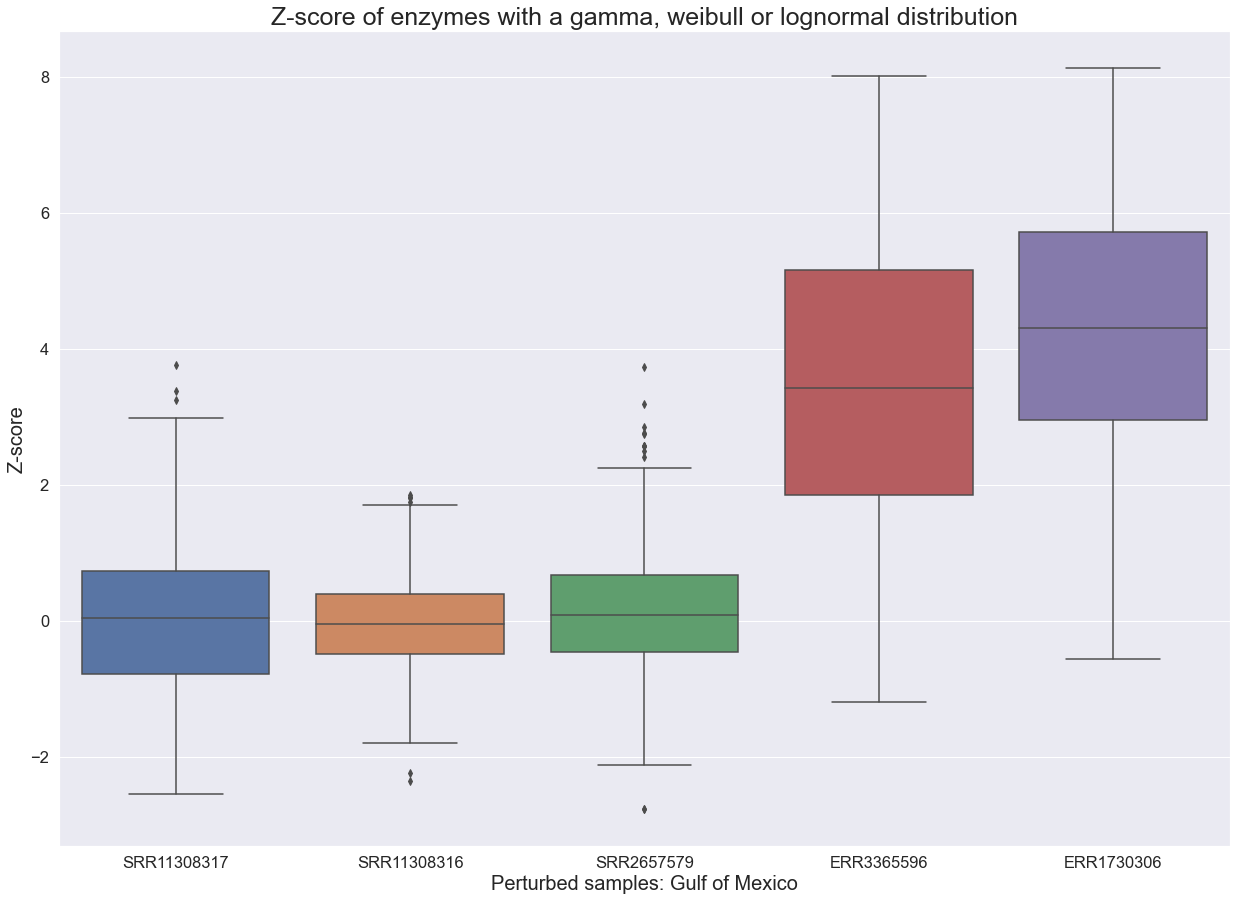

In [94]:
sns.set_theme(palette="hls")
sns.set(font_scale=1.5)
plt.figure(figsize=(21,15))
plt.tight_layout()
plt.title("Z-score of enzymes with a gamma, weibull or lognormal distribution", fontsize=25)
plt.xlabel("Perturbed samples: Gulf of Mexico", fontsize=20)
plt.ylabel("Z-score", fontsize=20)
sns.set_style("whitegrid")
sns.boxplot(data=DATA)
plt.savefig("Z-score_ec_dist_no_normal.png")

In [95]:
DATA_C=DATA.T

In [106]:
DATA_C

EC,E1.1.1.103,E1.1.1.127,E1.1.1.133,E1.1.1.136,E1.1.1.157,E1.1.1.159,E1.1.1.18,E1.1.1.2,E1.1.1.22,E1.1.1.26,...,E6.3.5.10,E6.3.5.11,E6.3.5.5,E6.3.5.9,E6.4.1.4,E6.5.1.1,E6.5.1.6,E6.5.1.7,E6.6.1.1,E6.6.1.2
SRR11308317,0.268447,0.522336,-1.543006,-0.534023,-0.101887,0.405947,-0.105569,-inf,-inf,1.254379,...,0.369557,-0.058772,-0.508090,-0.058772,1.276958,0.694174,-0.843986,-0.843986,-0.032243,0.961066
SRR11308316,0.751977,0.830092,-2.239383,0.763273,1.100667,-0.857313,-0.127431,-0.477839,-inf,0.817197,...,-0.376835,0.762913,0.963604,0.762913,-0.629131,-0.642569,-0.324022,-0.324022,-0.342638,-0.742273
SRR2657579,-0.060664,0.229223,-0.351662,-0.121445,0.515935,-0.821409,-1.139931,NaN,-inf,-1.350000,...,-0.138892,1.260815,0.381250,1.260815,0.825447,-1.858745,-inf,-inf,-0.166046,-0.460245
ERR3365596,NaN,NaN,NaN,NaN,1.811783,NaN,NaN,NaN,NaN,NaN,...,5.820731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.474653,1.304711
ERR1730306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.150639,3.674610,1.998256,3.674610,NaN,5.235968,4.329568,4.329568,3.806072,NaN


### Boxplot for all enzymes in the perturbed samples:

In [ ]:
df_z_scores_normales_golf_box=df_z_scores_normales_golf.T


In [110]:
df_zscrs_all=df_z_scores_normales_golf_box.join(DATA_C)

In [112]:
df_zscrs_all

,E1.1.1.1,E1.1.1.100,E1.1.1.169,E1.1.1.193,E1.1.1.205,E1.1.1.219,E1.1.1.23,E1.1.1.25,E1.1.1.267,E1.1.1.271,...,E6.3.5.10,E6.3.5.11,E6.3.5.5,E6.3.5.9,E6.4.1.4,E6.5.1.1,E6.5.1.6,E6.5.1.7,E6.6.1.1,E6.6.1.2
ERR1730306,8.135784,-0.830162,NaN,NaN,19.610984,NaN,NaN,9.717981,NaN,NaN,...,4.150639,3.674610,1.998256,3.674610,NaN,5.235968,4.329568,4.329568,3.806072,NaN
ERR3365596,NaN,NaN,5.972553,NaN,NaN,NaN,5.897085,NaN,NaN,NaN,...,5.820731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.474653,1.304711
SRR11308316,-0.603058,0.692365,1.239678,0.312845,0.713391,-0.891459,0.164694,-0.728453,0.899875,-1.172854,...,-0.376835,0.762913,0.963604,0.762913,-0.629131,-0.642569,-0.324022,-0.324022,-0.342638,-0.742273
SRR11308317,2.034384,2.364666,2.360355,0.755624,-0.388482,1.270289,-0.220074,-0.386980,-0.080797,-1.243658,...,0.369557,-0.058772,-0.508090,-0.058772,1.276958,0.694174,-0.843986,-0.843986,-0.032243,0.961066
SRR2657579,-0.136157,-0.410155,0.656517,-0.935300,0.601565,0.960404,-1.554348,-1.205593,0.537789,0.245333,...,-0.138892,1.260815,0.381250,1.260815,0.825447,-1.858745,-inf,-inf,-0.166046,-0.460245
SRR8457023,-1.909377,-1.863249,-1.594140,-0.588225,-2.216317,-1.756313,0.892902,-0.889403,-1.598789,-0.316198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df_zscrs_all_box=df_zscrs_all.T

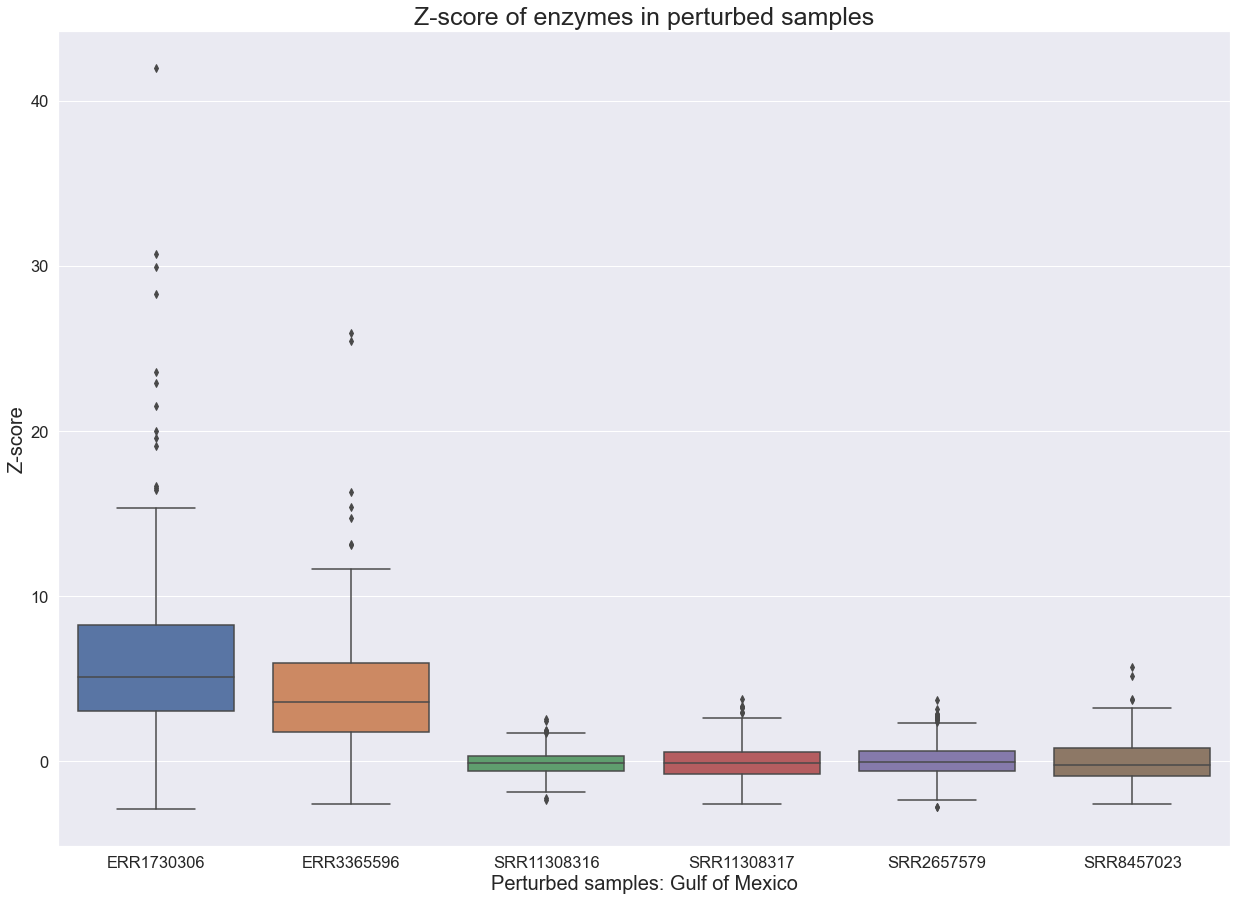

In [116]:
sns.set_theme(palette="hls")
sns.set(font_scale=1.5)
plt.figure(figsize=(21,15))
plt.tight_layout()
plt.title("Z-score of enzymes in perturbed samples", fontsize=25)
plt.xlabel("Perturbed samples: Gulf of Mexico", fontsize=20)
plt.ylabel("Z-score", fontsize=20)
sns.set_style("whitegrid")
sns.boxplot(data=df_zscrs_all_box)
plt.savefig("Z-score_todas.png")